<a href="https://colab.research.google.com/github/bintang170802/projects/blob/main/Penelitian_Kualitas_Air_Sungai.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Persiapan**

In [1]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 7.9 MB/s eta 0:00:00


In [2]:
# Menghubungkan ke google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Impor packages
import numpy as np
import pandas as pd
import openpyxl
import matplotlib.pyplot as plt
import seaborn as sns
import math
from sklearn.preprocessing import StandardScaler

# Clustering:
from sklearn.cluster import KMeans
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, pairwise_distances
import skfuzzy as fuzz

# Visualisasi t-SNE:
from sklearn.manifold import TSNE

import warnings
warnings.filterwarnings('ignore')

# **Import dan informasi data**

In [4]:
# Impor data
data = pd.read_excel('drive/MyDrive/filedata/data_sungai.xlsx', 'Sheet1', engine='openpyxl')
data

,River,Year,BOD,COD,TSS,DO,Total Phosphate,Fecal Coliform,Total Coliform
0,Oya,2020,0.003003,0.014547,0.025450,0.008937,0.000170,17586.666667,3.506667e+04
1,Kuning,2020,0.003797,0.018910,0.015020,0.008723,0.000683,153860.000000,1.588667e+05
2,Tambakbayan,2020,0.003830,0.012003,0.014033,0.007807,0.000520,377363.333333,3.919833e+05
3,Gajahwong,2020,0.003420,0.018697,0.007300,0.008080,0.000567,147433.333333,1.593200e+06
4,Belik,2020,0.011667,0.065973,0.017500,0.007670,0.001067,207596.666667,5.321833e+05
5,Code,2020,0.022810,0.065623,0.009960,0.007583,0.000543,39105.000000,1.436850e+05
6,Winongo,2020,0.005057,0.023403,0.011733,0.008680,0.001850,42560.000000,1.233000e+05
7,Bedog,2020,0.003907,0.019000,0.008233,0.009207,0.000577,33850.000000,3.995000e+04
8,Konteng,2020,0.002497,0.020543,0.009933,0.007943,0.000503,98166.666667,3.528333e+05
9,Bulus,2020,0.004125,0.018735,0.016405,0.007925,0.000940,73500.000000,3.675000e+05


In [5]:
# Dimensi dari dataset
data.shape

(40, 9)

In [6]:
# Tipe data setiap kolom dan variabel
data.dtypes

,0
River,object
Year,int64
BOD,float64
COD,float64
TSS,float64
DO,float64
Total Phosphate,float64
Fecal Coliform,float64
Total Coliform,float64


In [7]:
# Statistik tiap variabel
data.describe(include='all').T.drop(columns=['unique', 'top', 'freq'])

,count,mean,std,min,25%,50%,75%,max
River,40,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Year,40.0,2021.5,1.132277,2020.0,2020.75,2021.5,2022.25,2023.0
BOD,40.0,0.003214,0.003639,0.00084,0.001717,0.002467,0.003335,0.02281
COD,40.0,0.015517,0.012738,0.00468,0.009714,0.01223,0.016762,0.065973
TSS,40.0,0.015531,0.013153,0.002557,0.007525,0.01109,0.016679,0.06578
DO,40.0,0.00745,0.001068,0.003337,0.007028,0.007624,0.00802,0.009207
Total Phosphate,40.0,0.000726,0.001475,0.000103,0.000216,0.00051,0.000637,0.00959
Fecal Coliform,40.0,79849.247542,71080.947888,7100.006667,35334.1675,56538.883333,113335.0025,377363.333333
Total Coliform,40.0,182807.155958,280129.202683,18677.776667,49028.333333,99100.0,166650.0,1593200.0


In [8]:
# Info dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   River            40 non-null     object 
 1   Year             40 non-null     int64  
 2   BOD              40 non-null     float64
 3   COD              40 non-null     float64
 4   TSS              40 non-null     float64
 5   DO               40 non-null     float64
 6   Total Phosphate  40 non-null     float64
 7   Fecal Coliform   40 non-null     float64
 8   Total Coliform   40 non-null     float64
dtypes: float64(7), int64(1), object(1)
memory usage: 2.9+ KB


In [9]:
# Cek duplikat
any(data.duplicated())

False

In [10]:
# Cek nilai yang hilang
data.isna().sum()

,0
River,0
Year,0
BOD,0
COD,0
TSS,0
DO,0
Total Phosphate,0
Fecal Coliform,0
Total Coliform,0


In [11]:
# Sungai dan tahun menjadi index dari dataset
data.set_index(['River', 'Year'], inplace=True)

# **Uji Multikolinearitas**

In [12]:
# Cek multikolinearitas Keseluruhan
corr = data.corr()
corr

,BOD,COD,TSS,DO,Total Phosphate,Fecal Coliform,Total Coliform
BOD,1.000000,0.913265,-0.097205,0.077076,0.006007,0.115199,0.139342
COD,0.913265,1.000000,-0.089269,0.146997,-0.001520,0.189533,0.205251
TSS,-0.097205,-0.089269,1.000000,0.092758,-0.170981,-0.070565,-0.043849
DO,0.077076,0.146997,0.092758,1.000000,0.151869,-0.100901,-0.019922
Total Phosphate,0.006007,-0.001520,-0.170981,0.151869,1.000000,0.165690,0.025290
Fecal Coliform,0.115199,0.189533,-0.070565,-0.100901,0.165690,1.000000,0.423565
Total Coliform,0.139342,0.205251,-0.043849,-0.019922,0.025290,0.423565,1.000000


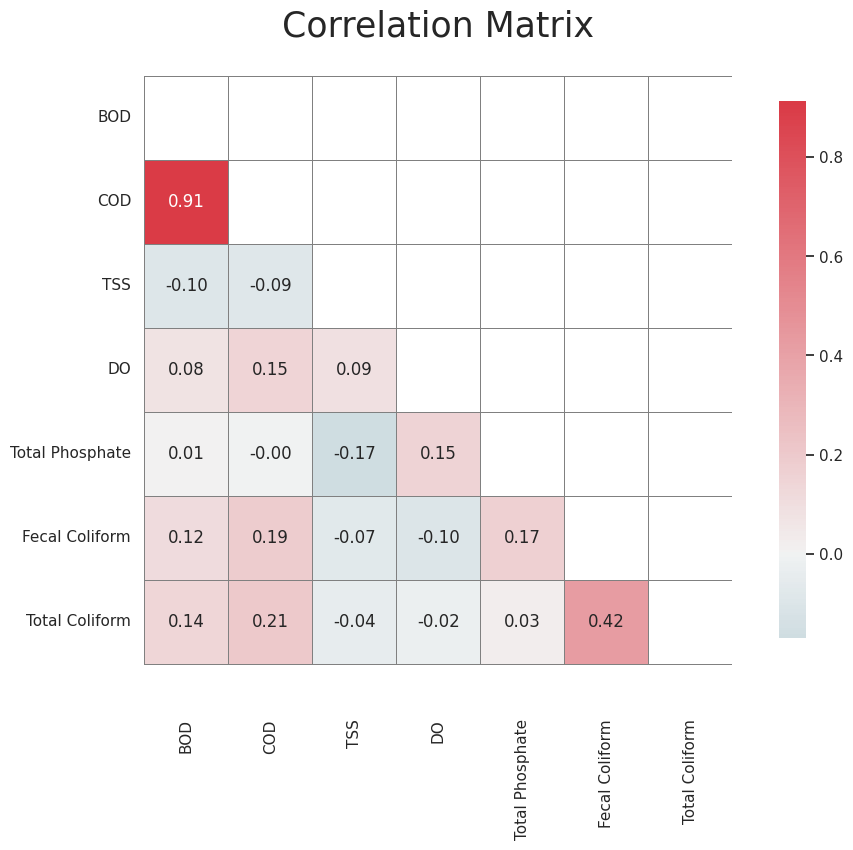

In [13]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Visualisasi nilai korelasi
sns.set(style='white')

# Menyembunyikan segitiga atas
mask = np.zeros_like(corr, dtype=bool) # Mengembalikan array false dengan bentuk dan tipe yang sama dengan array corr
mask[np.triu_indices_from(mask)] = True # Matriks segitiga atas disembunyikan

# Persiapan matplotlib
fig, ax = plt.subplots(figsize=(12, 8))

# Menghasilkan peta warna divergen khusus
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Gambar heatmap dengan mask dan desain baru
sns.heatmap(
    corr,
    mask=mask,
    cmap=cmap,
    center=0,
    square=True,
    annot=True,  # Menampilkan nilai di dalam kotak
    fmt=".2f",  # Format angka
    linewidths=0.7,  # Ketebalan garis pemisah
    linecolor='gray',  # Warna garis pemisah
    cbar_kws={"shrink": 0.8, "orientation": "vertical"},  # Pengaturan bar warna
    ax=ax
)

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle('Correlation Matrix', fontsize=25)
plt.yticks(rotation=0)

# Fix a bug
b, t = plt.ylim() # Tentukan space nilai atas dan bawah
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.show()

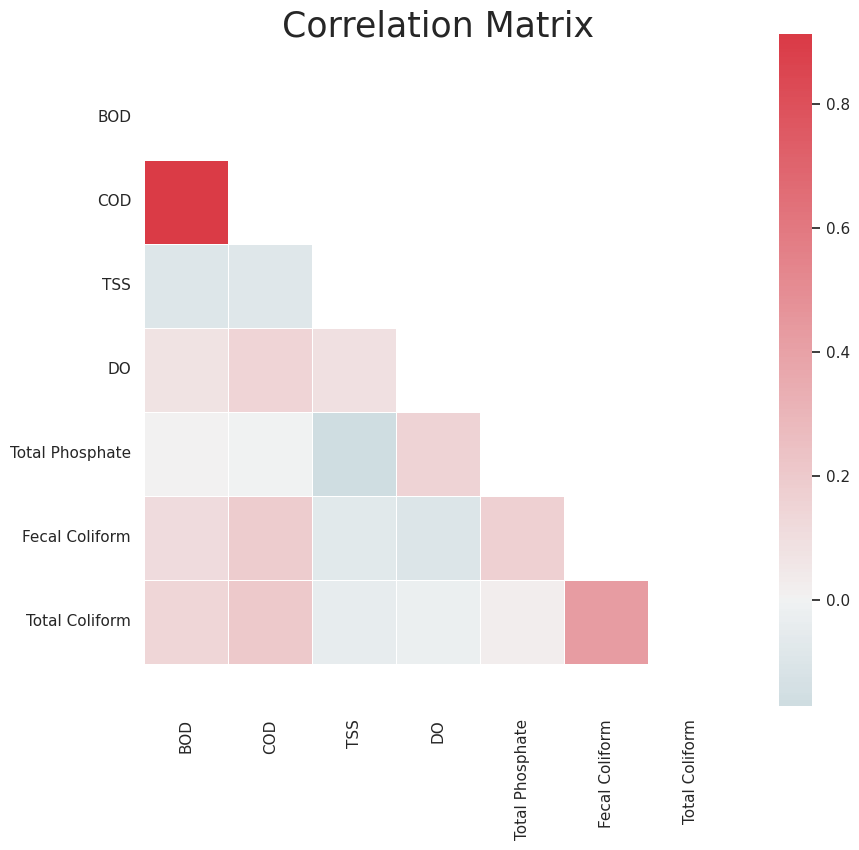

In [14]:
# Visualisasi nilai korelasi
sns.set(style='white')

# Menyembunyikan segitiga atas
mask = np.zeros_like(corr, dtype=bool) # Mengembalikan array false dengan bentuk dan tipe yang sama dengan array corr
mask[np.triu_indices_from(mask)] = True # Matriks segitiga atas disembunyikan

# Persiapan matplotlib
fig, ax = plt.subplots(figsize=(12, 8))

# Menghasilkan peta warna divergen khusus
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Gambar heatmap dengan mask dan aspek rasio yang benar
sns.heatmap(corr, cmap=cmap, center=0, square=True, mask=mask, linewidths=.5, ax=ax, fmt="s")

# Layout
plt.subplots_adjust(top=0.95)
plt.suptitle('Correlation Matrix', fontsize=25)
plt.yticks(rotation=0)

# Fix a bug
b, t = plt.ylim() # Tentukan space nilai atas dan bawah
b += 0.5
t -= 0.5
plt.ylim(b, t)
plt.show()

In [15]:
# Reduksi variabel
data.drop(columns=['BOD'], inplace=True)

In [16]:
data

,,COD,TSS,DO,Total Phosphate,Fecal Coliform,Total Coliform
River,Year,,,,,,
Oya,2020,0.014547,0.025450,0.008937,0.000170,17586.666667,3.506667e+04
Kuning,2020,0.018910,0.015020,0.008723,0.000683,153860.000000,1.588667e+05
Tambakbayan,2020,0.012003,0.014033,0.007807,0.000520,377363.333333,3.919833e+05
Gajahwong,2020,0.018697,0.007300,0.008080,0.000567,147433.333333,1.593200e+06
Belik,2020,0.065973,0.017500,0.007670,0.001067,207596.666667,5.321833e+05
Code,2020,0.065623,0.009960,0.007583,0.000543,39105.000000,1.436850e+05
Winongo,2020,0.023403,0.011733,0.008680,0.001850,42560.000000,1.233000e+05
Bedog,2020,0.019000,0.008233,0.009207,0.000577,33850.000000,3.995000e+04
Konteng,2020,0.020543,0.009933,0.007943,0.000503,98166.666667,3.528333e+05


# **Normalisasi Data**

In [17]:
# Normalisasi Z-score
scaler = StandardScaler()
normalized_data_z_score = scaler.fit_transform(data)
data_normal = pd.DataFrame(normalized_data_z_score, index=data.index, columns=data.columns)
data_normal

,,COD,TSS,DO,Total Phosphate,Fecal Coliform,Total Coliform
River,Year,,,,,,
Oya,2020,-0.077117,0.763756,1.409778,-0.381984,-0.887098,-0.534120
Kuning,2020,0.269792,-0.039320,1.207540,-0.029577,1.054482,-0.086551
Tambakbayan,2020,-0.279326,-0.115290,0.338551,-0.141707,4.238889,0.756226
Gajahwong,2020,0.252830,-0.633734,0.597668,-0.109670,0.962917,5.098934
Belik,2020,4.011579,0.151632,0.208992,0.233584,1.820106,1.263085
Code,2020,3.983752,-0.428923,0.126833,-0.125688,-0.580511,-0.141437
Winongo,2020,0.627036,-0.292382,1.166461,0.771348,-0.531286,-0.215134
Bedog,2020,0.276947,-0.561870,1.665735,-0.102804,-0.655383,-0.516465
Konteng,2020,0.399650,-0.430976,0.468109,-0.153148,0.260981,0.614689


# **K-Means clustering**

In [18]:
# Menggunakan fungsi kmeans dari library scikit-learn untuk melakukan clustering
kmeans = KMeans(n_clusters=5, random_state=4)
cluster_labels_kmeans = kmeans.fit_predict(data_normal)
hasil_kmeans = pd.DataFrame(cluster_labels_kmeans, index=data_normal.index)
hasil_kmeans

,,0
River,Year,
Oya,2020,0
Kuning,2020,1
Tambakbayan,2020,1
Gajahwong,2020,4
Belik,2020,3
Code,2020,3
Winongo,2020,0
Bedog,2020,0
Konteng,2020,0


In [19]:
# Jumlah iterasi
num_iterations_kmeans = kmeans.n_iter_
num_iterations_kmeans

3

In [20]:
# Jarak setiap objek ke centroid akhir
jarak_kmeans = pd.DataFrame(kmeans.transform(data_normal))
jarak_kmeans

,0,1,2,3,4
0,1.945391,2.353285,6.894892,4.756058,6.160306e+00
1,2.008173,1.837090,6.243059,3.950033,5.256388e+00
2,4.750700,3.749087,7.247638,5.612183,5.496476e+00
3,5.636260,5.238888,8.141474,5.932330,8.429370e-08
4,5.047528,4.637315,7.735762,1.432593,5.519275e+00
5,4.199472,4.742581,7.871640,1.432593,6.635309e+00
6,1.771295,2.657068,5.634090,3.850149,5.641651e+00
7,1.851243,2.941775,6.484044,4.367785,5.941226e+00
8,1.381788,1.904525,6.391132,3.646345,4.547803e+00
9,1.331946,1.646222,6.164009,3.827253,4.617803e+00


In [21]:
# Centroid akhir
centroid_kmeans = kmeans.cluster_centers_
pd.DataFrame(centroid_kmeans)

,0,1,2,3,4,5
0,-0.200944,-0.335581,-0.071250,-0.167811,-0.366482,-0.309807
1,-0.244314,1.187965,0.027470,-0.172472,0.774555,0.249639
2,-0.623849,-0.719970,0.743026,6.084914,0.721498,-0.102539
3,3.997666,-0.138645,0.167913,0.053948,0.619797,0.560824
4,0.252830,-0.633734,0.597668,-0.109670,0.962917,5.098934


# **Evaluasi K-Means**

In [22]:
# Calinski-Harabasz Index berbagai cluster menggunakan library scikit-learn
for i in range (2,6):
        clusters = KMeans(n_clusters=i, random_state=0)
        clusters.fit(data_normal)
        chi_score =calinski_harabasz_score(data_normal, clusters.labels_ )
        print('Cluster =', i , 'Memiliki Calinski-Harabasz Index', chi_score)

Cluster = 2 Memiliki Calinski-Harabasz Index 6.578123141682148
Cluster = 3 Memiliki Calinski-Harabasz Index 8.32079015178925
Cluster = 4 Memiliki Calinski-Harabasz Index 9.82301252458813
Cluster = 5 Memiliki Calinski-Harabasz Index 11.934012745526427


In [23]:
# Davies-Bouldin Index berbagai cluster menggunakan library scikit-learn
for i in range (2,6):
        clusters = KMeans(n_clusters=i, random_state=0)
        clusters.fit(data_normal)
        dbi_score =davies_bouldin_score(data_normal, clusters.labels_ )
        print('Cluster =', i , 'Memiliki Davies-Bouldin Index', dbi_score)

Cluster = 2 Memiliki Davies-Bouldin Index 1.3297281071777396
Cluster = 3 Memiliki Davies-Bouldin Index 0.9543132276318881
Cluster = 4 Memiliki Davies-Bouldin Index 0.8592241934347318
Cluster = 5 Memiliki Davies-Bouldin Index 1.0382166707305278


In [24]:
# Dunn Index berbagai cluster
def dunn_index(data, labels):
    k = len(np.unique(labels))  # Jumlah klaster
    cluster_distances = []  # Menyimpan jarak antara klaster

    # Loop untuk menghitung jarak antar klaster
    for i in range(k):
        for j in range(k):
            if j != i:
                # Menghitung jarak antara dua klaster
                distance = np.min(pairwise_distances(data[cluster_labels==i], data[cluster_labels==j]))
                cluster_distances.append(distance)

    # Menghitung jarak terdekat antara dua klaster
    min_inter_cluster_distance = np.min(cluster_distances)

    # Menghitung jarak terjauh di dalam klaster
    max_intra_cluster_distance = 0.0
    for l in range(k):
        intra_distances = pairwise_distances(data[labels==l])
        max_intra_cluster_distance = max(max_intra_cluster_distance, np.max(intra_distances))

    # Menghitung Dunn Index
    dunn_index_value = min_inter_cluster_distance / max_intra_cluster_distance
    return dunn_index_value

# Untuk menampung nilai indeks dunn
dunn_indices = []

# Menentukan range jumlah cluster yang akan dites
k_range = range(2, 6)

# Menghitung untuk beberapa nilai jumlah cluster
for m in k_range:
    kmeans = KMeans(n_clusters=m, random_state=0)
    cluster_labels = kmeans.fit_predict(data_normal)
    c_dunn_index = dunn_index(data_normal, cluster_labels)
    dunn_indices.append(c_dunn_index)

# Output
for m, dunn in zip(k_range, dunn_indices):
    print('Cluster =', m , 'Memiliki Dunn Index', dunn)

Cluster = 2 Memiliki Dunn Index 0.11362490682238964
Cluster = 3 Memiliki Dunn Index 0.13109443796246412
Cluster = 4 Memiliki Dunn Index 0.13109443796246412
Cluster = 5 Memiliki Dunn Index 0.13109443796246412


# **Fuzzy C-Means**

In [25]:
# Menggunakan FCM untuk melakukan clustering
cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data_normal.T, c=4, m=2, error=0.005, maxiter=1000)
membership = u.T
pd.DataFrame(membership)

,0,1,2,3
0,0.163356,0.252939,0.472206,0.111500
1,0.489835,0.173362,0.150262,0.186541
2,0.313467,0.189626,0.188844,0.308063
3,0.321866,0.211931,0.206984,0.259219
4,0.359788,0.190178,0.190617,0.259417
5,0.315913,0.239743,0.203392,0.240952
6,0.331650,0.322772,0.185621,0.159956
7,0.246581,0.407552,0.198999,0.146868
8,0.708550,0.111885,0.054939,0.124626
9,0.603594,0.145378,0.114619,0.136409


In [26]:
# Penentuan anggota cluster
cluster_labels_fcm = np.argmax(u, axis=0)
hasil_fcm = pd.DataFrame(cluster_labels_fcm, index=data_normal.index)
hasil_fcm

,,0
River,Year,
Oya,2020,2
Kuning,2020,0
Tambakbayan,2020,0
Gajahwong,2020,0
Belik,2020,0
Code,2020,0
Winongo,2020,0
Bedog,2020,1
Konteng,2020,0


In [27]:
# Centroid akhir
centroid_fcm = pd.DataFrame(cntr.T)
centroid_fcm

,0,1,2,3
0,0.536821,-0.274310,-0.313427,-0.001135
1,-0.062700,-0.523010,1.279819,-0.220377
2,0.329783,0.091617,0.309983,-0.705790
3,0.154526,-0.149305,-0.191961,0.036079
4,0.530225,-0.507978,-0.383738,0.604870
5,0.528957,-0.389598,-0.167438,0.122845


In [28]:
# Jarak setiap titik pada centroid akhir
jarak_fcm=pd.DataFrame(d.T)
jarak_fcm

,0,1,2,3
0,2.377629,1.910748,1.398445,2.877893
1,1.236891,2.079121,2.233220,2.004327
2,3.816088,4.906419,4.916571,3.849409
3,4.649753,5.730210,5.798278,5.181242
4,3.787276,5.209194,5.203182,4.460162
5,3.717301,4.267152,4.632805,4.256434
6,1.679842,1.702787,2.245407,2.418844
7,2.160155,1.680247,2.404576,2.798986
8,0.589985,1.484703,2.118772,1.406768
9,0.717656,1.462310,1.646876,1.509620


In [29]:
# Fungsi objektif awal sampai akhir
f_tujuan=pd.DataFrame(jm.T)
f_tujuan

,0
0,70.174918
1,59.976416
2,59.860688
3,59.742304
4,59.565835
5,59.302080
6,59.001851
7,58.786441
8,58.674012
9,58.603227


In [30]:
print('banyak iterasi: ', p)

banyak iterasi:  33


# **Evaluasi Fuzzy C-Means**

In [31]:
# Calinski-Harabasz Index
for i in range (2,6):
        # Memasukkan data ke dalam model FCM
        num_clusters = i
        cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data_normal.T, num_clusters, 2, error=0.005, maxiter=1000)
        # Mendapatkan label kluster dari tingkat keanggotaan
        cluster_membership = np.argmax(u, axis=0)
        chi_score =calinski_harabasz_score(data_normal, cluster_membership)
        print('Cluster =', i , 'Memiliki Calinski-Harabasz Index', chi_score)

Cluster = 2 Memiliki Calinski-Harabasz Index 6.617779206179663
Cluster = 3 Memiliki Calinski-Harabasz Index 7.06045384821051
Cluster = 4 Memiliki Calinski-Harabasz Index 8.020044492494563
Cluster = 5 Memiliki Calinski-Harabasz Index 7.493268836499866


In [32]:
# Davies-Bouldin Index
for i in range (2,6):
        # Memasukkan data ke dalam model FCM
        num_clusters = i
        cntr, u, u0, d, jm, p, fpc = fuzz.cluster.cmeans(data_normal.T, num_clusters, 2, error=0.005, maxiter=1000)
        # Mendapatkan label kluster dari tingkat keanggotaan
        cluster_membership = np.argmax(u, axis=0)
        dbi_score =davies_bouldin_score(data_normal, cluster_membership )
        print('Cluster =', i , 'Memiliki Davies-Bouldin Index', dbi_score)

Cluster = 2 Memiliki Davies-Bouldin Index 1.9911047836605575
Cluster = 3 Memiliki Davies-Bouldin Index 2.1521285147893976
Cluster = 4 Memiliki Davies-Bouldin Index 1.5627280715283172
Cluster = 5 Memiliki Davies-Bouldin Index 1.692908999665048


In [33]:
# Dunn Index berbagai cluster
def dunn_index(data, labels):
    k = len(np.unique(labels))  # Jumlah klaster
    cluster_distances = []  # Menyimpan jarak antara klaster

    # Loop untuk menghitung jarak antar klaster
    for i in range(k):
        for j in range(k):
            if j != i:
                # Menghitung jarak antara dua klaster
                distance = np.min(pairwise_distances(data[cluster_labels==i], data[cluster_labels==j]))
                cluster_distances.append(distance)

    # Menghitung jarak terdekat antara dua klaster
    min_inter_cluster_distance = np.min(cluster_distances)

    # Menghitung jarak terjauh di dalam klaster
    max_intra_cluster_distance = 0.0
    for l in range(k):
        intra_distances = pairwise_distances(data[labels==l])
        max_intra_cluster_distance = max(max_intra_cluster_distance, np.max(intra_distances))

    # Menghitung Dunn Index
    dunn_index_value = min_inter_cluster_distance / max_intra_cluster_distance
    return dunn_index_value

# Untuk menampung nilai indeks dunn
dunn_indices = []

# Menentukan range jumlah cluster yang akan dites
cluster_range = range(2, 6)

# Menghitung untuk beberapa nilai jumlah cluster
for n_clusters in cluster_range:
    cntr, u, _, _, _, _, _ = fuzz.cluster.cmeans(data_normal.T, n_clusters, m=2, error=0.005, maxiter=1000)
    cluster_membership = np.argmax(u, axis=0)
    c_dunn_index = dunn_index(data_normal, cluster_membership)
    dunn_indices.append(c_dunn_index)

# Output
for n_clusters, dunn in zip(cluster_range, dunn_indices):
    print('Cluster =', n_clusters , 'Memiliki Dunn Index', dunn)

Cluster = 2 Memiliki Dunn Index 0.2062241507413164
Cluster = 3 Memiliki Dunn Index 0.2062241507413164
Cluster = 4 Memiliki Dunn Index 0.2062241507413164
Cluster = 5 Memiliki Dunn Index 0.11362490682238964


# **Visualisasi Hasil Clustering Teroptimal**

In [34]:
pip install adjustText

In [35]:
from adjustText import adjust_text

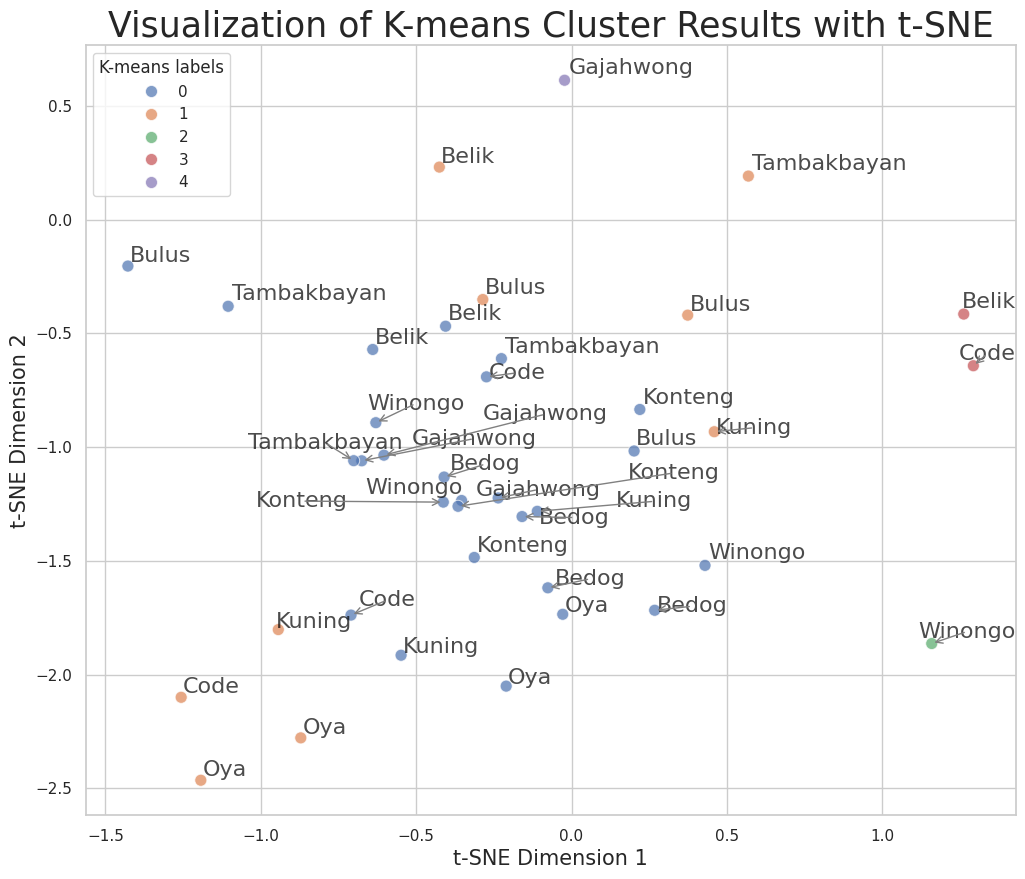

In [36]:
# Menampilkan hasil clustering
# Memanggil k-means
clust_labels_km = cluster_labels_kmeans
cent_km = centroid_kmeans

# Menambahkan label cluster ke kerangka data baru
data_kmeans_final = data_normal.copy()
data_kmeans_final['k_means_labels'] = clust_labels_km

# Menerapkan t-SNE
two_dim = TSNE(random_state=0).fit_transform(data_kmeans_final.drop(columns='k_means_labels'))

two_dim_final = pd.DataFrame(two_dim, index=data_kmeans_final.index).merge(data_kmeans_final['k_means_labels'], on=['River','Year'])

two_dim_final.columns = ['x', 'y', 'K-means labels']

#

sns.set(style='whitegrid')

plt.figure(figsize=(12, 10))

# visualisasi t-SNE
sns.scatterplot(data=two_dim_final, x='x', y='y', hue='K-means labels', s=75, palette='deep', alpha=0.7)

# Tata letak
plt.title('Visualization of K-means Cluster Results with t-SNE', size=25)

# Label sumbu dengan ukuran font yang lebih besar
plt.xlabel('t-SNE Dimension 1', fontsize=15)
plt.ylabel('t-SNE Dimension 2', fontsize=15)

# Menambahkan grid untuk memperjelas plot
plt.grid(True)

# Beri label titik data pada plot pencar
def label_point(x, y, val, ax):
    a = pd.concat({'x': x, 'y': y, 'val': val}, axis=1)
    texts = []  # Inisialisasi daftar teks
    for i, point in a.iterrows():
        text = ax.text(point['x'], point['y'], str(point['val']), fontsize=16, ha='left', alpha=0.7, color='black')
        texts.append(text)  # Menyimpan teks dalam daftar

    # Menggunakan adjustText untuk menghindari tumpang tindih label
    adjust_text(texts, force_text=0.1, expand_text=(1.05, 1.05), arrowprops=dict(arrowstyle="->", color='gray'))


# Menambahkan lingkaran untuk setiap cluster
#for cluster in two_dim_final['K-means labels'].unique():
    # Ambil data titik dengan label cluster tertentu
    #cluster_data = two_dim_final[two_dim_final['K-means labels'] == cluster]

    # Hitung koordinat tengah dan radius lingkaran
    #mean_x = cluster_data['x'].mean()
    #mean_y = cluster_data['y'].mean()
    #radius = np.max(np.sqrt((cluster_data['x'] - mean_x) ** 2 + (cluster_data['y'] - mean_y) ** 2))

    # Gambar lingkaran untuk cluster
    # circle = plt.Circle((mean_x, mean_y), radius, color=sns.color_palette('deep')[cluster], fill=False, linestyle='--', linewidth=2)
    # plt.gca().add_patch(circle)


two_dim_labels = two_dim_final.reset_index()
label_point(two_dim_labels.x, two_dim_labels.y, two_dim_labels.River, plt.gca())

plt.show()

# **Analisis Hasil Clustering**

In [37]:
# Centroid sebenarnya (didenormalisasi)
cluster_centers_real = scaler.inverse_transform(centroid_kmeans)
pd.DataFrame(cluster_centers_real)

,0,1,2,3,4,5
0,0.012989,0.011172,0.007374,0.000482,54127.061852,9.711276e+04
1,0.012444,0.030959,0.007479,0.000475,134212.815741,2.518588e+05
2,0.007670,0.006180,0.008233,0.009590,130488.890000,1.544444e+05
3,0.065798,0.013730,0.007627,0.000805,123350.833333,3.379342e+05
4,0.018697,0.007300,0.008080,0.000567,147433.333333,1.593200e+06


In [38]:
# Profil Cluster
data['Cluster'] = cluster_labels_kmeans

# Menghitung statistik untuk setiap klaster dan variabel
cluster_stats = data.groupby('Cluster').agg(['mean', 'std', 'min', 'max'])

# Menampilkan profil klaster dalam bentuk DataFrame
pd.DataFrame(cluster_stats.T)

Cluster                           0              1              2  \
COD             mean       0.012989       0.012444       0.007670   
                std        0.005137       0.005658            NaN   
                min        0.004727       0.004680       0.007670   
                max        0.025087       0.023665       0.007670   
TSS             mean       0.011172       0.030959       0.006180   
                std        0.006712       0.018474            NaN   
                min        0.002557       0.014033       0.006180   
                max        0.027667       0.065780       0.006180   
DO              mean       0.007374       0.007479       0.008233   
                std        0.001186       0.000914            NaN   
                min        0.003337       0.006000       0.008233   
                max        0.009207       0.008723       0.008233   
Total Phosphate mean       0.000482       0.000475       0.009590   
                std        0.000371       0.000217            NaN   
                min        0.000103       0.000103       0.009590   
                max        0.001850       0.000800       0.009590   
Fecal Coliform  mean   54127.061852  134212.815741  130488.890000   
                std    34830.760156  109504.981290            NaN   
                min     7100.006667   13444.443333  130488.890000   
                max   130977.780000  377363.333333  130488.890000   
Total Coliform  mean   97112.757531  251858.778333  154444.446667   
                std    86607.796036  252637.004387            NaN   
                min    18677.776667   22538.890000  154444.446667   
                max   367500.000000  860389.000000  154444.446667   

Cluster                           3             4  
COD             mean       0.065798  1.869667e-02  
                std        0.000247           NaN  
                min        0.065623  1.869667e-02  
                max        0.065973  1.869667e-02  
TSS             mean       0.013730  7.300000e-03  
                std        0.005332           NaN  
                min        0.009960  7.300000e-03  
                max        0.017500  7.300000e-03  
DO              mean       0.007627  8.080000e-03  
                std        0.000061           NaN  
                min        0.007583  8.080000e-03  
                max        0.007670  8.080000e-03  
Total Phosphate mean       0.000805  5.666667e-04  
                std        0.000370           NaN  
                min        0.000543  5.666667e-04  
                max        0.001067  5.666667e-04  
Fecal Coliform  mean  123350.833333  1.474333e+05  
                std   119141.600073           NaN  
                min    39105.000000  1.474333e+05  
                max   207596.666667  1.474333e+05  
Total Coliform  mean  337934.166667  1.593200e+06  
                std   274709.805980           NaN  
                min   143685.000000  1.593200e+06  
                max   532183.333333  1.593200e+06

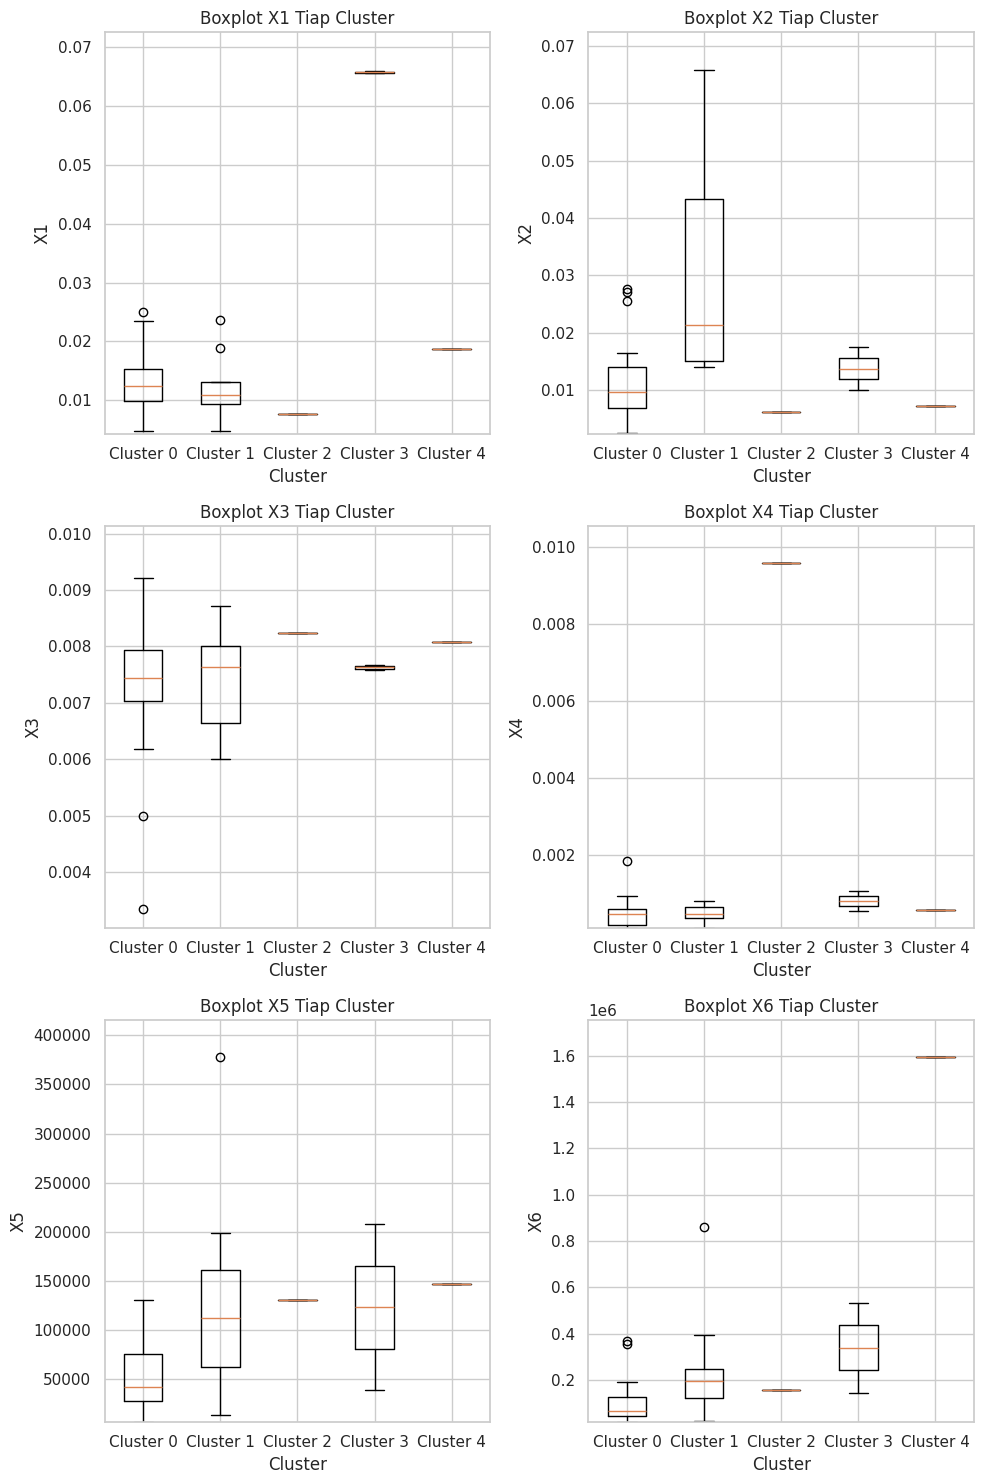

In [39]:
# Membuat satu frame dengan boxplot untuk setiap variabel dalam setiap klaster
num_features = len(data.columns) - 1  # Jumlah fitur (tanpa kolom Cluster)

plt.figure(figsize=(10, 15))  # Ukuran frame boxplot

for feature_index in range(num_features):
    plt.subplot(3, 2, feature_index + 1)  # 3 baris, 2 kolom, indeks subplot dimulai dari 1
    plt.title(f'Boxplot X{feature_index + 1} Tiap Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(f'X{feature_index + 1}')

    feature_name = data.columns[feature_index]
    boxplot_data = [data[data['Cluster'] == cluster][feature_name].values for cluster in range(num_clusters)]

    plt.boxplot(boxplot_data, labels=[f'Cluster {i}' for i in range(num_clusters)])

    # Menyesuaikan skala pada sumbu y (y-axis)
    min_val = min([np.min(box) for box in boxplot_data])
    max_val = max([np.max(box) for box in boxplot_data])
    plt.ylim(min_val - 0.1 * abs(min_val), max_val + 0.1 * abs(max_val))

plt.tight_layout()
plt.show()